In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import easygui

In [3]:
easygui.fileopenbox()

'C:\\Users\\Saravanan\\Downloads\\insurance.csv'

In [4]:
df=pd.read_csv('C:\\Users\\Saravanan\\Downloads\\insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.describe().style.background_gradient()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe(include='object').style.background_gradient()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [17]:
df.corr().style.background_gradient(cmap='copper')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

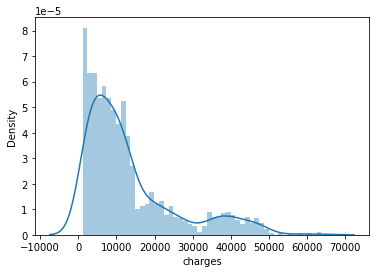

In [29]:
sns.distplot(df.charges,bins=50)

c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

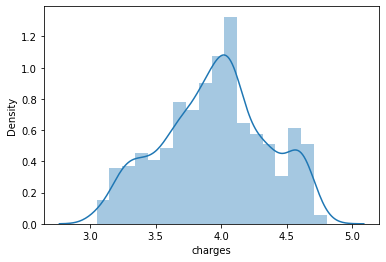

In [28]:
sns.distplot(np.log10(df.charges))

c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='charges'>

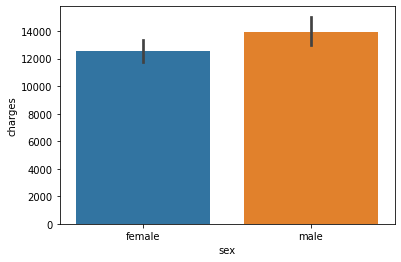

In [33]:
sns.barplot(df.sex,df.charges)

c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

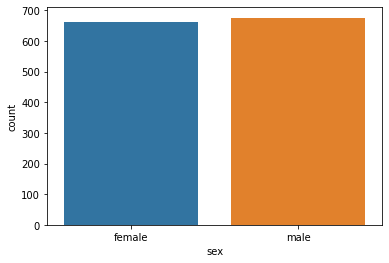

In [34]:
sns.countplot(df.sex)

In [35]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

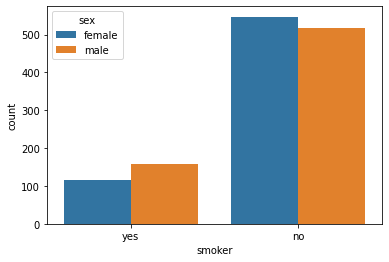

In [36]:
sns.countplot(df.smoker,hue=df.sex)

In [39]:
df.groupby(['sex'])['smoker'].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='charges'>

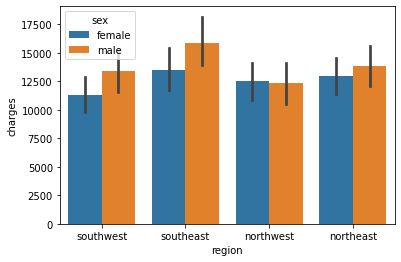

In [40]:
sns.barplot(df.region,df.charges,hue=df.sex)

c:\Users\Saravanan\anaconda3\envs\saravananml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

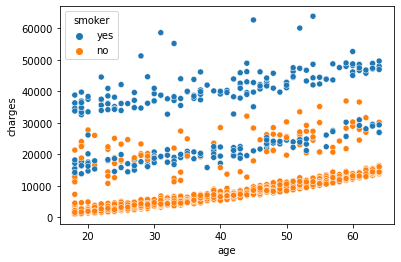

In [41]:
sns.scatterplot(df.age,df.charges,hue=df.smoker)

In [44]:
categorical_columns=df.select_dtypes(include='object').columns

In [46]:
categorical_columns=['sex', 'smoker', 'region']

In [54]:
df_encoded=pd.get_dummies(data=df,  columns = categorical_columns,drop_first =True,dtype='int8')

In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   int8   
 5   smoker_yes        1338 non-null   int8   
 6   region_northwest  1338 non-null   int8   
 7   region_southeast  1338 non-null   int8   
 8   region_southwest  1338 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 48.5 KB


In [57]:
df_encoded["charges"]=np.log(df["charges"])

In [58]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,1,0,1,0,0
1334,18,31.920,0,7.698927,0,0,0,0,0
1335,18,36.850,0,7.396233,0,0,0,1,0
1336,21,25.800,0,7.604867,0,0,0,0,1


In [59]:
from sklearn.model_selection import train_test_split  

In [68]:
x=df_encoded.drop('charges',axis=1)
y=df_encoded[["charges"]]



In [69]:
y

,charges
0,9.734176
1,7.453302
2,8.400538
3,9.998092
4,8.260197
...,...
1333,9.268661
1334,7.698927
1335,7.396233
1336,7.604867


In [70]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

In [74]:
lin=LinearRegression()
lin

LinearRegression()

In [76]:
lin.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred=lin.predict(x_train)

In [77]:
from sklearn.metrics import mean_squared_error,r2_score

In [82]:
y_train

,charges
332,9.505174
355,10.110626
138,10.215474
381,10.652630
292,10.648094
...,...
1095,8.425339
1130,9.057457
1294,9.386906
860,10.738861


In [81]:
y_pred

array([[ 9.50316594],
       [ 8.79874919],
       [ 9.46296054],
       [10.82815197],
       [10.03021709],
       [10.46933521],
       [ 8.48147311],
       [ 8.39505064],
       [ 9.6211065 ],
       [ 8.88030878],
       [10.54898839],
       [ 8.16592682],
       [ 8.79465422],
       [ 9.37517537],
       [10.1365285 ],
       [ 8.53562355],
       [ 8.13205317],
       [ 9.48694205],
       [ 8.35154356],
       [ 8.40880201],
       [ 8.90055525],
       [ 7.77132011],
       [10.17735599],
       [ 9.02190407],
       [ 8.87116987],
       [ 8.29714889],
       [ 8.69276866],
       [ 9.38585928],
       [ 9.99096184],
       [ 8.99374906],
       [ 8.94986792],
       [ 8.53144459],
       [ 8.75297266],
       [ 8.04899573],
       [ 8.70377755],
       [ 8.95678612],
       [ 9.1906773 ],
       [ 9.04940467],
       [ 8.71970685],
       [ 8.03820649],
       [ 8.86247466],
       [10.40693159],
       [10.58956881],
       [ 8.01938963],
       [11.00511956],
       [ 9

In [85]:
mse=mean_squared_error(y_train,y_pred)

In [86]:
r2_score(y_train,y_pred)

0.7606778619658179

In [88]:
x_test_pred=lin.predict(x_test)

In [89]:
r2_score(y_test,x_test_pred)

0.7844611237346827